In [3]:
import os
import shutil
import os
import numpy as np
from skimage import io
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

high_path = '/content/drive/MyDrive/high'
low_path = '/content/drive/MyDrive/low'

train_high_path = 'train/high'
train_low_path = 'train/low'
test_high_path = 'test/high'
test_low_path = 'test/low'

# Create directories if they do not exist
for path in [train_high_path, train_low_path, test_high_path, test_low_path]:
    os.makedirs(path, exist_ok=True)

# Function to get list of .png files from a directory
def get_png_files(directory):
    return sorted([f for f in os.listdir(directory) if f.endswith('.png')])

# Retrieve and sort files
high_files = get_png_files(high_path)
low_files = get_png_files(low_path)

# Ensure the number of files in high and low are equal
assert len(high_files) == len(low_files), "The number of files in 'high' and 'low' are not equal."

# Determine the split index for 80:20 ratio
split_index = int(len(high_files) * 0.8)

# Split the files into training and testing sets
train_high_files, test_high_files = high_files[:split_index], high_files[split_index:]
train_low_files, test_low_files = low_files[:split_index], low_files[split_index:]

# Function to copy files to the respective directories
def copy_files(files, src_dir, dst_dir):
    for file in files:
        shutil.copy(os.path.join(src_dir, file), os.path.join(dst_dir, file))

# Copy the files to the training and testing directories
copy_files(train_high_files, high_path, train_high_path)
copy_files(test_high_files, high_path, test_high_path)
copy_files(train_low_files, low_path, train_low_path)
copy_files(test_low_files, low_path, test_low_path)


print(f"Ntraining files in 'high': {len(train_high_files)}")
print(f"  testing files in 'high': {len(test_high_files)}")
print(f"training files in 'low': {len(train_low_files)}")
print(f"testing files in 'low': {len(test_low_files)}")


Files have been divided into training and testing sets.
Number of training files in 'high': 388
Number of testing files in 'high': 97
Number of training files in 'low': 388
Number of testing files in 'low': 97


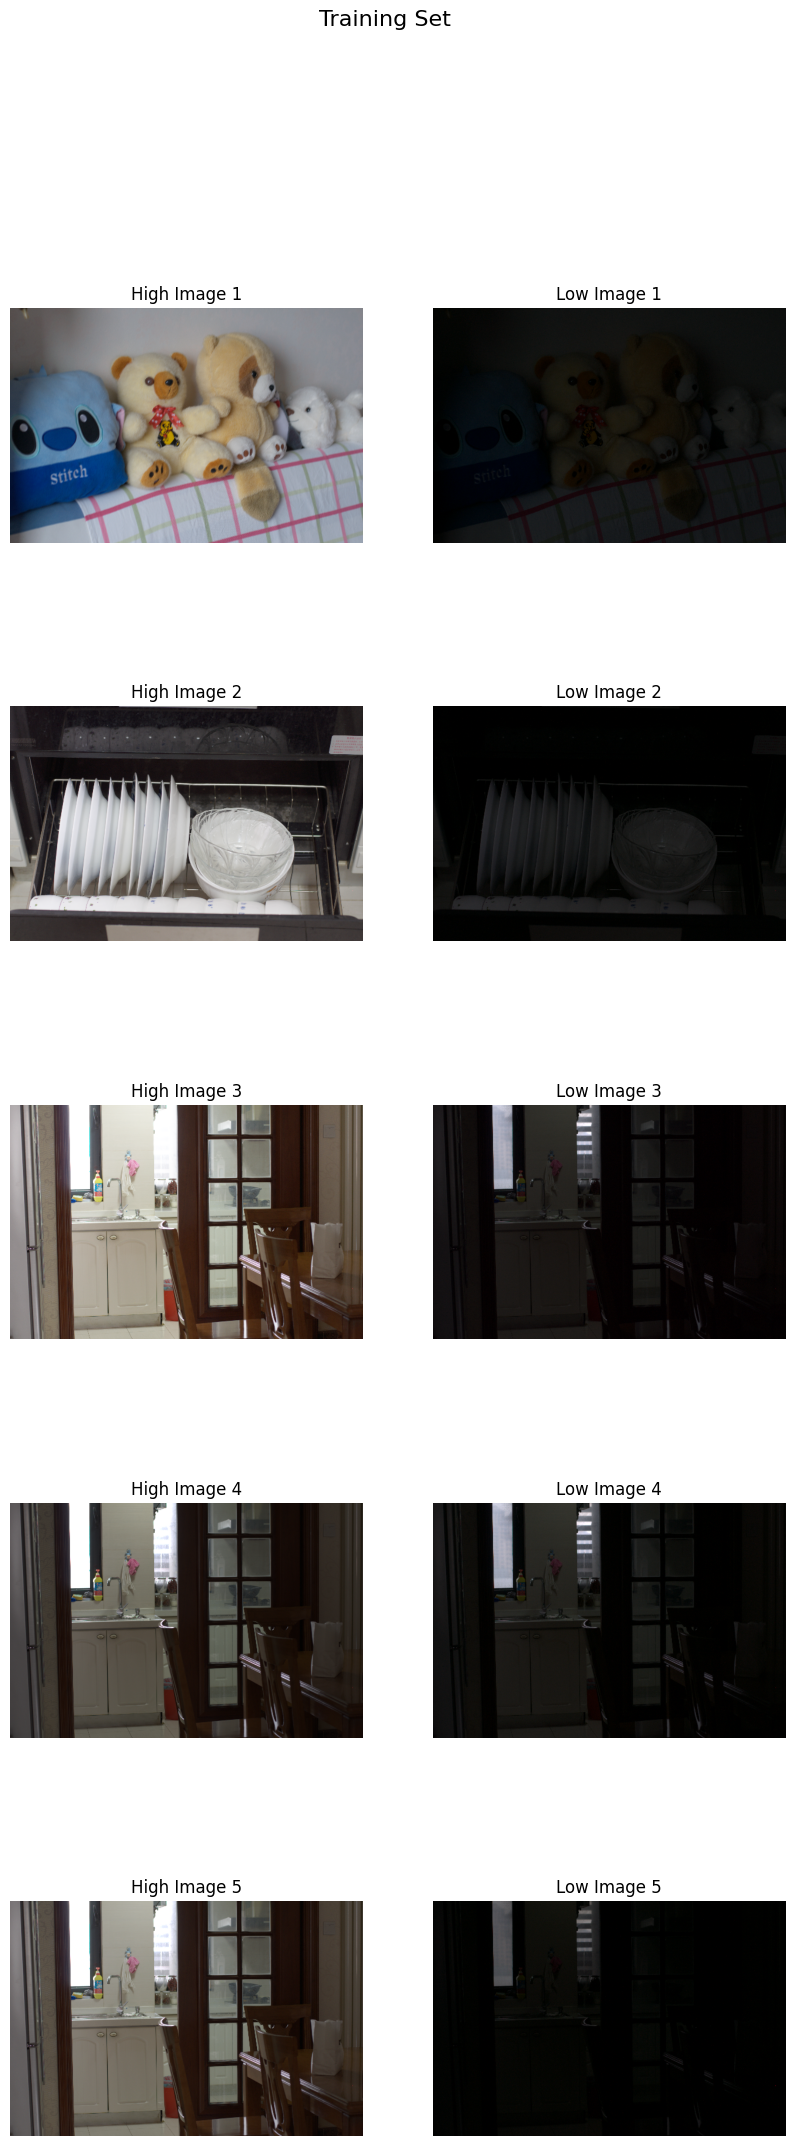

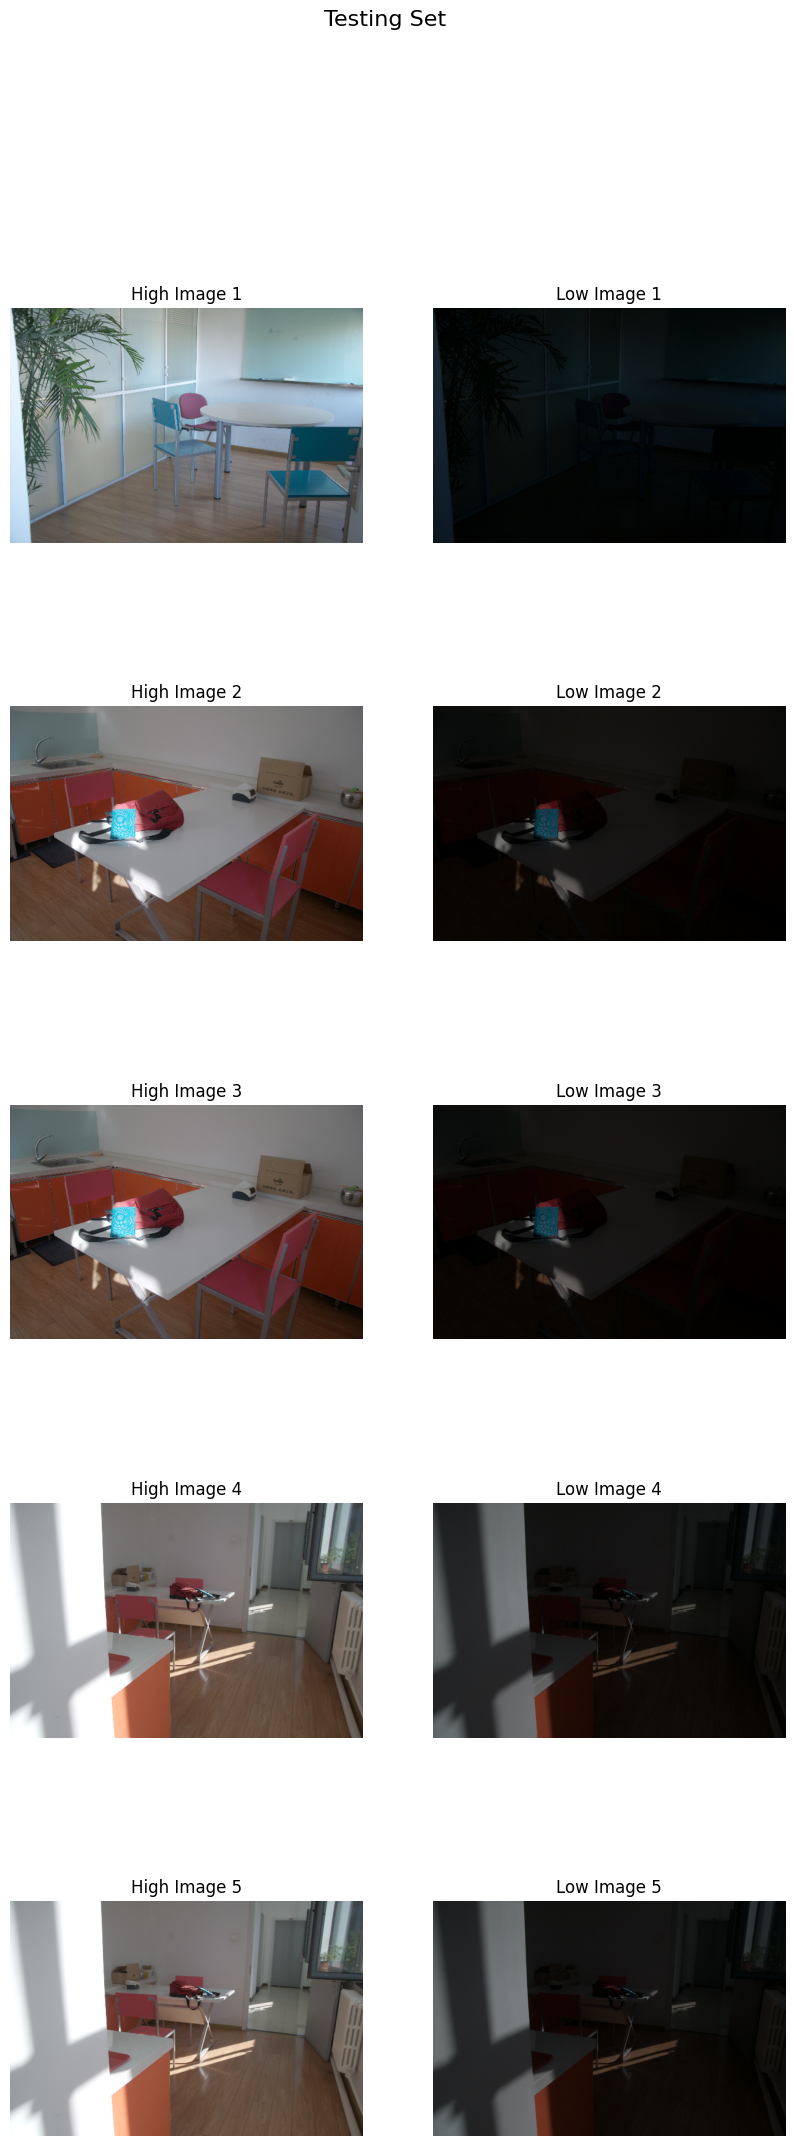

In [19]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the paths to the new directories for training and testing sets
train_high_path = 'train/high'
train_low_path = 'train/low'
test_high_path = 'test/high'
test_low_path = 'test/low'

# Function to retrieve sorted list of .png files from a directory
def get_sorted_png_files(directory):
    return sorted([f for f in os.listdir(directory) if f.endswith('.png')])

# Function to visualize corresponding images
def visualize_images(high_path, low_path, title):
    high_files = get_sorted_png_files(high_path)
    low_files = get_sorted_png_files(low_path)

    # Select a few images to visualize
    num_images = min(5, len(high_files))  # Visualize up to 5 pairs
    fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))
    fig.suptitle(title, fontsize=16)

    for i in range(num_images):
        high_image_path = os.path.join(high_path, high_files[i])
        low_image_path = os.path.join(low_path, low_files[i])

        high_image = Image.open(high_image_path)
        low_image = Image.open(low_image_path)

        # Display high image
        axes[i, 0].imshow(high_image)
        axes[i, 0].set_title(f'High Image {i+1}')
        axes[i, 0].axis('off')

        # Display low image
        axes[i, 1].imshow(low_image)
        axes[i, 1].set_title(f'Low Image {i+1}')
        axes[i, 1].axis('off')

    plt.show()

# Visualize training images
visualize_images(train_high_path, train_low_path, 'Training Set')

# Visualize testing images
visualize_images(test_high_path, test_low_path, 'Testing Set')



In [5]:



train_high_path = 'train/high'
train_low_path = 'train/low'
test_high_path = 'test/high'
test_low_path = 'test/low'

# Function to calculate PSNR and SSIM
def calculate_metrics(high_path, low_path):
    high_files = [f for f in os.listdir(high_path) if f.endswith('.png')]
    low_files = [f for f in os.listdir(low_path) if f.endswith('.png')]

    # Sort to ensure corresponding pairs
    high_files.sort()
    low_files.sort()

    psnr_values = []
    ssim_values = []

    for high_file, low_file in zip(high_files, low_files):
        high_image = io.imread(os.path.join(high_path, high_file))
        low_image = io.imread(os.path.join(low_path, low_file))

        psnr_value = peak_signal_noise_ratio(high_image, low_image)
        ssim_value = structural_similarity(high_image, low_image, multichannel=True)

        psnr_values.append(psnr_value)
        ssim_values.append(ssim_value)

    avg_psnr = np.mean(psnr_values)
    avg_ssim = np.mean(ssim_values)

    return avg_psnr, avg_ssim

train_avg_psnr, train_avg_ssim = calculate_metrics(train_high_path, train_low_path)
print(f"Training Set - Average PSNR: {train_avg_psnr:.2f}, Average SSIM: {train_avg_ssim:.4f}")

# Calculate metrics for testing set
test_avg_psnr, test_avg_ssim = calculate_metrics(test_high_path, test_low_path)
print(f"Testing Set - Average PSNR: {test_avg_psnr:.2f}, Average SSIM: {test_avg_ssim:.4f}")


<ipython-input-5-f85db9c8e8c0>:29: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = structural_similarity(high_image, low_image, multichannel=True)


Training Set - Average PSNR: 7.39, Average SSIM: 0.1719
Testing Set - Average PSNR: 9.16, Average SSIM: 0.2001


In [6]:
import os
from PIL import Image
import numpy as np

# Define the paths to the directories
train_high_path = 'train/high'
train_low_path = 'train/low'
test_high_path = 'test/high'
test_low_path = 'test/low'

# Define the patch size and the new image size
new_size = (1024, 1024)
patch_size = (256, 256)

# Function to resize and create patches
def resize_and_create_patches(src_path, dst_path):
    os.makedirs(dst_path, exist_ok=True)
    files = [f for f in os.listdir(src_path) if f.endswith('.png')]

    patch_count = 0
    for file in files:
        image_path = os.path.join(src_path, file)
        image = Image.open(image_path).resize(new_size)
        image_array = np.array(image)

        # Create patches
        for i in range(0, new_size[0], patch_size[0]):
            for j in range(0, new_size[1], patch_size[1]):
                patch = image_array[i:i + patch_size[0], j:j + patch_size[1]]
                patch_image = Image.fromarray(patch)
                patch_file_name = f"{os.path.splitext(file)[0]}_{i}_{j}.png"
                patch_image.save(os.path.join(dst_path, patch_file_name))
                patch_count += 1

    return patch_count

# Function to process both high and low directories
def process_directories(high_src_path, low_src_path, high_dst_path, low_dst_path):
    high_patch_count = resize_and_create_patches(high_src_path, high_dst_path)
    low_patch_count = resize_and_create_patches(low_src_path, low_dst_path)
    return high_patch_count, low_patch_count

# Define the output paths for patches
train_high_patches_path = 'train_patches/high'
train_low_patches_path = 'train_patches/low'
test_high_patches_path = 'test_patches/high'
test_low_patches_path = 'test_patches/low'

# Process the directories and count the patches
train_high_patch_count, train_low_patch_count = process_directories(train_high_path, train_low_path, train_high_patches_path, train_low_patches_path)
test_high_patch_count, test_low_patch_count = process_directories(test_high_path, test_low_path, test_high_patches_path, test_low_patches_path)

# Print the number of patches in each directory
print(f"Number of patches in train high: {train_high_patch_count}")
print(f"Number of patches in train low: {train_low_patch_count}")
print(f"Number of patches in test high: {test_high_patch_count}")
print(f"Number of patches in test low: {test_low_patch_count}")


Number of patches in train high: 6208
Number of patches in train low: 6208
Number of patches in test high: 1552
Number of patches in test low: 1552


In [7]:
import numpy as np
from tensorflow.keras.utils import Sequence
from PIL import Image

class DataGenerator(Sequence):
    def __init__(self, X_paths, y_paths, batch_size=1, shuffle=False):
        self.X_paths = X_paths
        self.y_paths = y_paths
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.X_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        X = [self.load_image(self.X_paths[k]) for k in indexes]
        y = [self.load_image(self.y_paths[k]) for k in indexes]

        return np.array(X), np.array(y)

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.X_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def load_image(self, img_path):
        img = Image.open(img_path)
        img = img.resize((256, 256))  # Resize image to 256x256
        img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        return img

# Example usage
# Define paths to your train and test patches
train_high_paths = ['train_patches/high/' + f for f in os.listdir('train_patches/high/') if f.endswith('.png')]
train_low_paths = ['train_patches/low/' + f for f in os.listdir('train_patches/low/') if f.endswith('.png')]
test_high_paths = ['test_patches/high/' + f for f in os.listdir('test_patches/high/') if f.endswith('.png')]
test_low_paths = ['test_patches/low/' + f for f in os.listdir('test_patches/low/') if f.endswith('.png')]

batch_size = 64
train_generator = DataGenerator(train_high_paths, train_low_paths, batch_size=batch_size, shuffle=False)
test_generator = DataGenerator(test_high_paths, test_low_paths, batch_size=batch_size, shuffle=False)



In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, concatenate, Add, GlobalAveragePooling2D, Reshape, Activation, Multiply, Input

class EAM(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        self.conv1 = Conv2D(64, (3,3), dilation_rate=1, padding='same', activation='relu')
        self.conv2 = Conv2D(64, (3,3), dilation_rate=2, padding='same', activation='relu')
        self.conv3 = Conv2D(64, (3,3), dilation_rate=3, padding='same', activation='relu')
        self.conv4 = Conv2D(64, (3,3), dilation_rate=4, padding='same', activation='relu')
        self.conv5 = Conv2D(64, (3,3), padding='same', activation='relu')
        self.conv6 = Conv2D(64, (3,3), padding='same', activation='relu')
        self.conv7 = Conv2D(64, (3,3), padding='same')
        self.conv8 = Conv2D(64, (3,3), padding='same', activation='relu')
        self.conv9 = Conv2D(64, (3,3), padding='same', activation='relu')
        self.conv10 = Conv2D(64, (1,1), padding='same')
        self.gap = GlobalAveragePooling2D()
        self.conv11 = Conv2D(64, (3,3), padding='same', activation='relu')
        self.conv12 = Conv2D(64, (3,3), padding='same', activation='sigmoid')

    def call(self, input):
        conv1 = self.conv1(input)
        conv1 = self.conv2(conv1)
        conv2 = self.conv3(input)
        conv2 = self.conv4(conv2)
        concat = concatenate([conv1, conv2])
        conv3 = self.conv5(concat)
        add1 = Add()([input, conv3])
        conv4 = self.conv6(add1)
        conv4 = self.conv7(conv4)
        add2 = Add()([conv4, add1])
        add2 = Activation('relu')(add2)
        conv5 = self.conv8(add2)
        conv5 = self.conv9(conv5)
        conv5 = self.conv10(conv5)
        add3 = Add()([add2, conv5])
        add3 = Activation('relu')(add3)
        gap = self.gap(add3)
        gap = Reshape((1,1,64))(gap)
        conv6 = self.conv11(gap)
        conv6 = self.conv12(conv6)
        mul = Multiply()([conv6, add3])
        out = Add()([input, mul])
        return out



In [10]:
from tensorflow.keras.layers import Conv2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
# Clear any previous TensorFlow graph/session
tf.keras.backend.clear_session()

# Define input shape
input_shape = (256, 256, 3)
input_img = Input(shape=input_shape)

# Feature Extraction Module
conv1 = Conv2D(64, (3,3), padding='same')(input_img)

# Feature Learning Residual on Residual Module (EAMs)
eam1 = EAM()(conv1)
eam2 = EAM()(eam1)
eam3 = EAM()(eam2)
eam4 = EAM()(eam3)

# Reconstruction Module
conv2 = Conv2D(3, (3,3), padding='same')(eam4)
output_img = Add()([conv2, input_img])  # Residual connection

# Define RIDNet model
RIDNet = Model(input_img, output_img)

# Compile the model
RIDNet.compile(optimizer=Adam(learning_rate=1e-3), loss=MeanSquaredError())

# Display model summary
RIDNet.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 eam (EAM)                   (None, 256, 256, 64)         447232    ['conv2d[0][0]']              
                                                                                                  
 eam_1 (EAM)                 (None, 256, 256, 64)         447232    ['eam[0][0]']                 
                                                                                              

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Add, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Define EAM (Enhancement Attention Module)
def EAM():
    def layer(input_tensor):
        # Here, define the structure of your EAM.
        # This is a placeholder for the actual EAM implementation.
        conv = Conv2D(64, (3, 3), activation='relu', padding='same')(input_tensor)
        return conv
    return layer

# Clear any previous TensorFlow graph/session
tf.keras.backend.clear_session()

# Define input shape
input_shape = (256, 256, 3)
input_img = Input(shape=input_shape)

# Feature Extraction Module
conv1 = Conv2D(64, (3, 3), padding='same')(input_img)

# Feature Learning Residual on Residual Module (EAMs)
eam1 = EAM()(conv1)
eam2 = EAM()(eam1)
eam3 = EAM()(eam2)
eam4 = EAM()(eam3)

# Reconstruction Module
conv2 = Conv2D(3, (3, 3), padding='same')(eam4)
output_img = Add()([conv2, input_img])  # Residual connection

# Define RIDNet model
RIDNet = Model(input_img, output_img)

# Compile the model
RIDNet.compile(optimizer=Adam(learning_rate=1e-3), loss=MeanSquaredError())

# Display model summary
RIDNet.summary()

# Example usage of DataGenerator with the RIDNet
batch_size = 32
train_generator = DataGenerator(train_high_paths, train_low_paths, batch_size=batch_size, shuffle=True)
test_generator = DataGenerator(test_high_paths, test_low_paths, batch_size=batch_size, shuffle=True)

# Define callbacks
checkpoint_callback = ModelCheckpoint(filepath='RIDNet_best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model with the checkpoint callback
history = RIDNet.fit(train_generator,
                     epochs=1,
                     validation_data=test_generator,
                     callbacks=[checkpoint_callback])

# Save the final model
RIDNet.save('denoiser_model.h5')

# Function to denoise images and compute PSNR and SSIM
def denoise_and_evaluate(generator, model):
    psnr_values = []
    ssim_values = []
    num_batches = len(generator)

    for i in range(num_batches):
        X_batch, y_batch = generator[i]
        denoised_batch = model.predict(X_batch)

        for j in range(len(X_batch)):
            original_image = X_batch[j]
            denoised_image = denoised_batch[j]

            # Compute PSNR
            psnr = peak_signal_noise_ratio(original_image, denoised_image)
            psnr_values.append(psnr)

            # Compute SSIM
            ssim = structural_similarity(original_image, denoised_image, multichannel=True)
            ssim_values.append(ssim)

    avg_psnr = np.max(psnr_values)
    avg_ssim = np.mean(ssim_values)

    return avg_psnr, avg_ssim

# Load the best model
RIDNet_best = load_model('RIDNet_best_model.h5')

# Calculate PSNR and SSIM for test set
avg_psnr, avg_ssim = denoise_and_evaluate(test_generator, RIDNet_best)

predicted_dir = 'test/predicted/'
os.makedirs(predicted_dir, exist_ok=True)

for i in range(len(test_generator)):
    X_batch, y_batch = test_generator[i]
    denoised_batch = RIDNet_best.predict(X_batch)

    for j in range(len(X_batch)):
        denoised_image = (denoised_batch[j] * 255).astype(np.uint8)
        img = Image.fromarray(denoised_image)
        img.save(os.path.join(predicted_dir, f"denoised_{i * batch_size + j}.png"))



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d_1[0][0]']            
                                                                                              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 701ms/step


<ipython-input-14-4bd0665fb890>:79: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original_image, denoised_image)
<ipython-input-14-4bd0665fb890>:83: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(original_image, denoised_image, multichannel=True)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


1/1 [==============================] - 1s 580ms/step


In [21]:


print(f"Average PSNR: {avg_psnr:.2f}")


Average PSNR: 27.45
